<a href="https://colab.research.google.com/github/akul-bharadwaj/Computer-Vision-Assessment-Planogram-Dataset/blob/main/gap_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fine-tuning YOLOv5 with Shelf Images for Planogram dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [5]:
!git clone https://github.com/akul-bharadwaj/Computer-Vision-Assessment-Planogram-Dataset

Cloning into 'Computer-Vision-Assessment-Planogram-Dataset'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), 635.80 KiB | 4.05 MiB/s, done.


## Loading the dataset from Kaggle

In [6]:
import kagglehub
import shutil
import os

# Download the dataset (default location)
downloaded_path = kagglehub.dataset_download("aamiraliansari/shelf-images-for-planograms")

destination_path = "Computer-Vision-Assessment-Planogram-Dataset/datasets/shelf_planograms"

os.makedirs(destination_path, exist_ok=True)

# Move all contents to the custom folder
for item in os.listdir(downloaded_path):
    s = os.path.join(downloaded_path, item)
    d = os.path.join(destination_path, item)
    if os.path.isdir(s):
        shutil.move(s, d)
    else:
        shutil.move(s, d)

print("Dataset moved to:", destination_path)

100%|██████████| 224M/224M [00:01<00:00, 207MB/s]

Extracting files...


Dataset moved to: Computer-Vision-Assessment-Planogram-Dataset/datasets/shelf_planograms


## Modifying the *data.yaml* file



In [16]:
with open('Computer-Vision-Assessment-Planogram-Dataset/datasets/shelf_planograms/DATASET_Planogram/data.yaml', 'w') as f:
    f.write('''
train: /content/drive/MyDrive/Computer-Vision-Assessment-Planogram-Dataset/datasets/shelf_planograms/DATASET_Planogram/train/images
val: /content/drive/MyDrive/Computer-Vision-Assessment-Planogram-Dataset/datasets/shelf_planograms/DATASET_Planogram/valid/images

nc: 1
names: ['void']
''')

In [9]:
!pip install yolov5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.5/953.5 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.5/417.5 kB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.5 MB/s eta 0:00:00
  

## Model Training and Validation to detect gaps

In [17]:
!yolov5 train --data Computer-Vision-Assessment-Planogram-Dataset/datasets/shelf_planograms/DATASET_Planogram/data.yaml --weights yolov5s.pt --batch-size 16 --img 640

Streaming output truncated to the last 5000 lines.
      63/99      4.76G    0.03192    0.03492          0        149        640:  86% 113/131 [00:23<00:04,  3.74it/s]`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
      63/99      4.76G    0.03193    0.03504          0        176        640:  86% 113/131 [00:23<00:04,  3.74it/s]`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
      63/99      4.76G    0.03193    0.03503          0        118        640:  88% 115/131 [00:23<00:03,  4.69it/s]`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
      63/99      4.76G    0.03192     0.0351          0        155        640:  88% 115/131 [00:23<00:03,  4.69it/s]`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
      63/99      4.76G    0.03193    0.03508         

## Testing the model for few images from test set

In [18]:
import yolov5

# Loading trained model
model = yolov5.load('/content/drive/MyDrive/Computer-Vision-Assessment-Planogram-Dataset/runs/train/exp4/weights/best.pt')

# Setting the inference parameters
model.conf = 0.25       # Confidence threshold
model.iou = 0.45        # IoU threshold for NMS
model.agnostic = False  # NMS class-agnostic
model.multi_label = False
model.max_det = 1000    # Max detections per image

In [19]:
img_path_1 = '/content/drive/MyDrive/Computer-Vision-Assessment-Planogram-Dataset/datasets/shelf_planograms/DATASET_Planogram/test/images/test2020_1167_jpg.rf.9dd75758a95b919ac895d46172d2b555.jpg'
results_1 = model(img_path_1)

/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [24]:
import cv2
import matplotlib.pyplot as plt

preds_1 = results_1.pred[0]

img_1 = cv2.imread(img_path_1)
img_1 = img_1.copy()

# Draw bounding boxes
for *box, conf, cls in preds_1:
    x1, y1, x2, y2 = map(int, box)
    cv2.rectangle(img_1, (x1, y1), (x2, y2), (0, 0, 255), 2)

cv2.imwrite("/content/drive/MyDrive/Computer-Vision-Assessment-Planogram-Dataset/output_yolo_1.jpg", img_1)

True

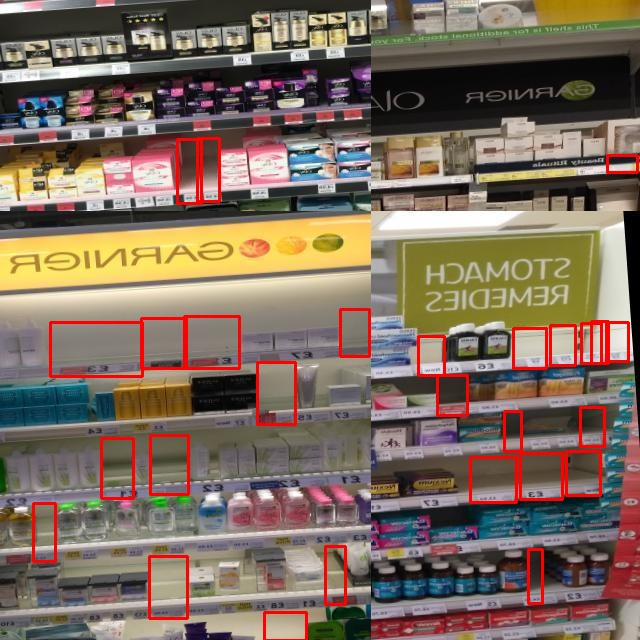

In [27]:
from IPython.display import Image
Image("/content/drive/MyDrive/Computer-Vision-Assessment-Planogram-Dataset/output_yolo_1.jpg")

In [28]:
img_path_2 = '/content/drive/MyDrive/Computer-Vision-Assessment-Planogram-Dataset/datasets/shelf_planograms/DATASET_Planogram/test/images/test2020_462_jpg.rf.700c963622ac44b8b4c9426883fe4f0c.jpg'
results_2 = model(img_path_2)

/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [34]:
import cv2
import matplotlib.pyplot as plt

preds_2 = results_2.pred[0]

img_2 = cv2.imread(img_path_2)
img_2 = img_2.copy()

# Draw bounding boxes
for *box, conf, cls in preds_2:
    x1, y1, x2, y2 = map(int, box)
    cv2.rectangle(img_2, (x1, y1), (x2, y2), (0, 0, 255), 2)

cv2.imwrite("/content/drive/MyDrive/Computer-Vision-Assessment-Planogram-Dataset/output_yolo_2.jpg", img_2)

True

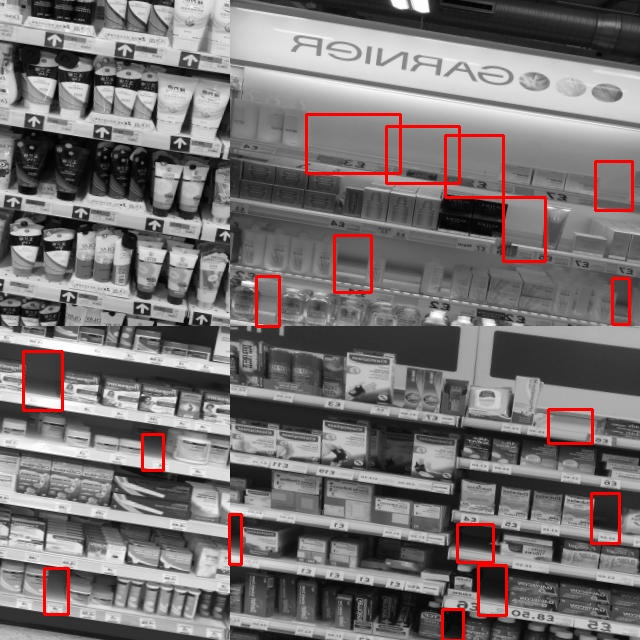

In [35]:
from IPython.display import Image
Image("/content/drive/MyDrive/Computer-Vision-Assessment-Planogram-Dataset/output_yolo_2.jpg")